In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
from sklearn.linear_model import Lasso

In [46]:
car_dataset=pd.read_csv('https://raw.githubusercontent.com/RimjimRazdan/cars_price_prediction/master/car%20data.csv')


In [47]:
car_dataset


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [48]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [49]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [50]:
print(car_dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [51]:
print(car_dataset.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [52]:
## Encoding the data
car_dataset.replace({"Fuel_Type": {"Petrol": 0, "Diesel": 1, "CNG": 2}}, inplace=True)
car_dataset.replace({"Transmission": {"Automatic": 0, "Manual": 1}}, inplace=True)
car_dataset.replace({"Seller_Type": {"Dealer": 0, "Individual": 1, "CNG": 2}}, inplace=True)


In [53]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,0,0,1,0
298,city,2009,3.35,11.00,87934,0,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


In [54]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [55]:
Y=car_dataset["Selling_Price"]
X=car_dataset.drop(['Car_Name',"Selling_Price"],axis=1)

In [56]:
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,train_size=0.4,random_state=2)

In [57]:
lin_reg=LinearRegression()

In [58]:

lin_reg.fit(X_train,Y_train)

LinearRegression()

In [59]:
train_prediction=lin_reg.predict(X_train)

In [60]:
## Accuracy score is used for classification and r mean square for regression problem

In [61]:
error_score=metrics.r2_score(Y_train,train_prediction)

In [62]:
error_score

0.8568176728508567

Text(0.5, 1.0, 'Actual vs Predited')

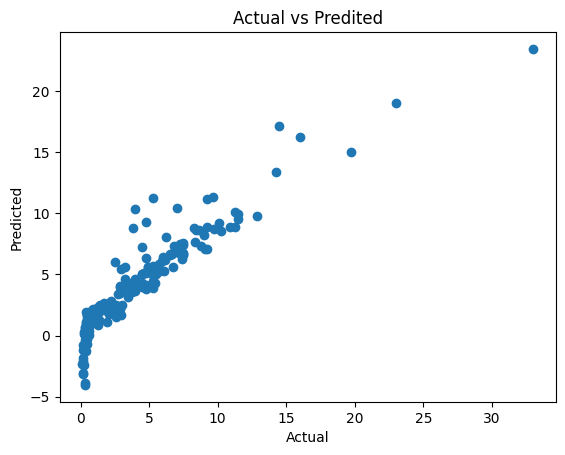

In [74]:
plt.scatter(Y_train,train_prediction)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Actual vs Predited')

In [65]:
model=Lasso()

In [66]:
model.fit(X_train,Y_train)

Lasso()

In [71]:
lasso_train_prediction=model.predict(X_train)

In [72]:
errorr2=metrics.r2_score(Y_train,lasso_train_prediction)

In [73]:
errorr2

0.8310838241972796